In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn; assert sklearn.__version__ >= "0.20"


import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
fichero = "C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\archivos\\winequality-red.csv"
datos = pd.read_csv(fichero)

In [3]:
from sklearn.model_selection import train_test_split

X, y = datos.drop('quality', axis=1), datos['quality']
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)


Escalado de los valores de X:

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

Semilla:

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
X_train.shape

(899, 11)

### Creación de la red neuronal

In [107]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(11,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [108]:
model.compile(loss="mean_squared_error",
              optimizer= keras.optimizers.SGD(learning_rate=0.001))

### Resumen del modelo

In [109]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561 (2.19 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [116]:
h = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4095 - val_loss: 0.4173
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4093 - val_loss: 0.4171
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4091 - val_loss: 0.4170
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4089 - val_loss: 0.4167
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4088 - val_loss: 0.4166
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4085 - val_loss: 0.4163
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4084 - val_loss: 0.4163
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4082 - val_loss: 0.4160
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4080 - val_loss: 0.4160
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4078 - val_loss: 0.4157
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4076 - val_loss: 0.4157
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4

<Axes: >

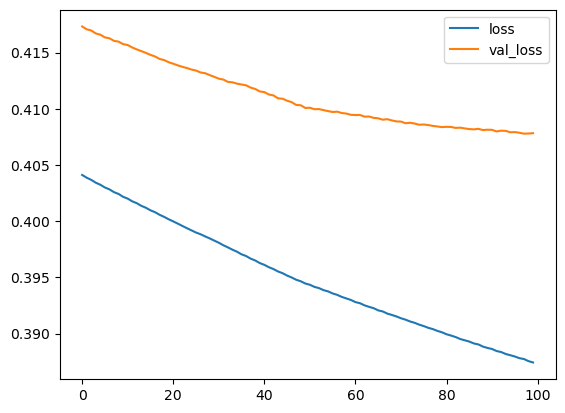

In [117]:
#plt.plot(pd.DataFrame(model.history.history))
pd.DataFrame(h.history).plot()

### Evaluación del modelo

In [118]:
mse_test = model.evaluate(X_test, y_test)
mse_test

# 0.4003 -> 3 capas de nodos, la del medio de 20 y las otras de 10

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3742 


0.4003150761127472

In [119]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[5.25601  ],
       [6.190746 ],
       [6.4196706]], dtype=float32)